In [129]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [130]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0) #nối x0, x1,x2
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

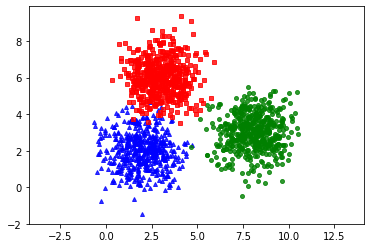

In [131]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [132]:
X = np.vstack((X0,X1,X2))
X

array([[ 3.74945474,  1.713927  ],
       [ 1.51543487, -0.65331856],
       [ 1.99171537,  1.68036864],
       ...,
       [ 2.56402984,  5.10138061],
       [ 3.62998852,  6.60564711],
       [ 2.31894139,  6.84856953]])

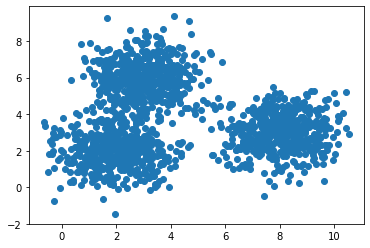

In [133]:
plt.scatter(X[:, 0], X[:, 1])

In [134]:
def identify_centers(X, n_cluster):
    return X[np.random.choice(X.shape[0],n_cluster, replace=False)]

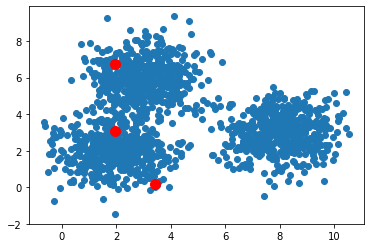

In [135]:
plt.scatter(X[:, 0], X[:, 1])
centers = identify_centers(X, 3)
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=100)

In [136]:
def assign_labels(X, centers):
    distance = cdist(X, centers)
    #print(distance)
    return np.argmin(distance, axis = 1)

In [137]:
def update_centers(X, label, n_cluster):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range(n_cluster):
    centers[k,:] = np.mean(X[label == k], axis = 0) 
  return centers

In [139]:
def kmeans(X, n_cluster):
    centers = identify_centers(X, n_cluster)
    labels = []
    running = True
    while running:
        labels = assign_labels(X, centers)
        new_centers = update_centers(X, labels, n_cluster)
        if (centers == new_centers).all():
            running == False
        return labels,new_centers

In [143]:
def display_kmean(X,labels,new_centers):
    plt.scatter(X[:, 0], X[:, 1], c = labels)
    plt.scatter(new_centers[:, 0], new_centers[:, 1], c='r', s=100)
    plt.show()

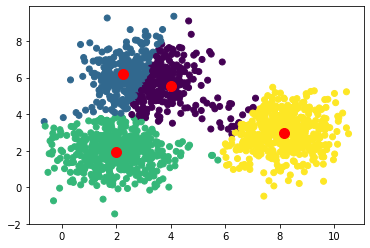

In [144]:
labels,new_centers = kmeans(X,4)
display_kmean(X,labels,new_centers)

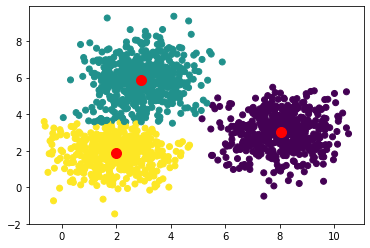

In [145]:
labels,new_centers = kmeans(X,3)
display_kmean(X,labels,new_centers)

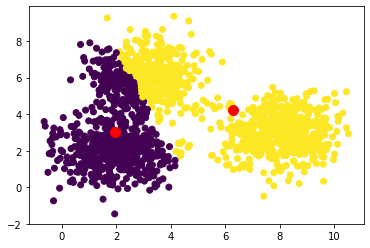

In [146]:
labels,new_centers = kmeans(X,2)
display_kmean(X,labels,new_centers)